   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

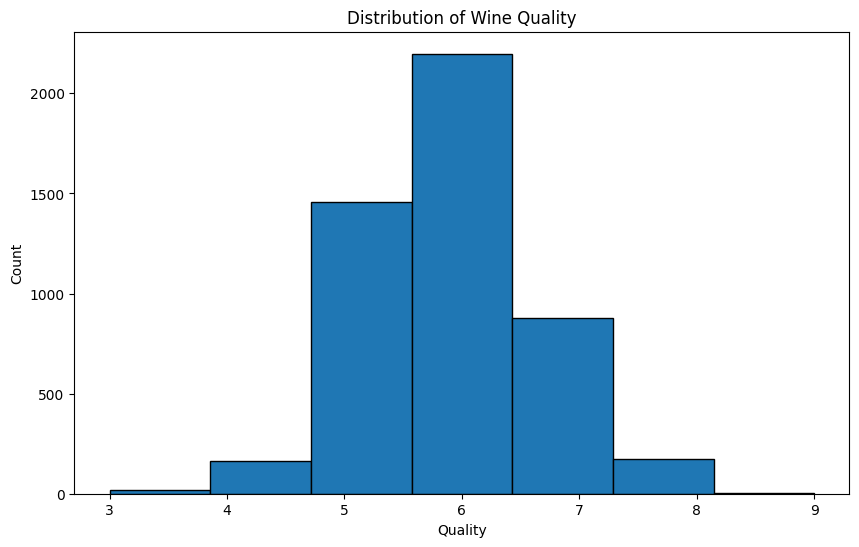

Random Forest MSE: 0.345291887755102
SVR with RBF Kernel MSE: 0.41216709951443936
Neural Network MSE: 0.4779210536624853


In [ ]:
############################################################################################################################################################
#                                           EE769-INTRODUCTION TO MACHINE LEARNING                                                                         #
#                                                             ~BY                                                                                          #
#                                                               ~SANJAY R                                                                                  #
#                                                               ~23M0002                                                                                   #
############################################################################################################################################################
#                                                       REFERENCES:
#                                                      [1]. CHATGPT 3.5 LLC
#                                                      [2]. https://archive.ics.uci.edu/ml/datasets/Wine+Quality
#                                                      [3]. https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
#                                                      [4]. https://scikit-learn.org/stable/modules/impute.html
#                                                      [5]. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
#                                                      [6]. https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
#                                                      [7]. https://www.youtube.com/watch?v=5XnHlluw-Eo
############################################################################################################################################################

###Q1
#[1]
# Import necessary libraries
import numpy as np                                                        # NumPy for numerical operations
import pandas as pd                                                       # Pandas for data manipulation
import matplotlib.pyplot as plt                                           # Matplotlib for data visualization
from sklearn.model_selection import train_test_split, GridSearchCV        # functions for data splitting and hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor                        # Random Forest Regressor model
from sklearn.svm import SVR                                               # Support Vector Regressor model
from sklearn.neural_network import MLPRegressor                           # Multi-layer Perceptron Regressor model
from sklearn.metrics import mean_squared_error                            # function to calculate mean squared error
from sklearn.preprocessing import StandardScaler                          # StandardScaler for feature scaling
from urllib.request import urlretrieve                                    # function to download data from a URL
###Q1 a)
# To download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"  # URL of the dataset [2]
data_file = "winequality-white.csv"  # Name of the downloaded file to store the dataset
urlretrieve(url, data_file)  # To save it locally

wine_data = pd.read_csv(data_file, delimiter=';')  # Read the dataset into a Pandas DataFrame, specifying the delimiter as ';'
###Q1 b)
# To explore the data
print(wine_data.head())  # Print the first few rows of the dataset to understand its structure
print(wine_data.describe())  # Print summary statistics of the dataset

# For Visualization ...
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.hist(wine_data['quality'], bins=7, edgecolor='black')  # Create a histogram of the 'quality' column
plt.xlabel('Quality')  # Label the x-axis as 'Quality'
plt.ylabel('Count')  # Label the y-axis as 'Count'
plt.title('Distribution of Wine Quality')  # Set the title of the plot
plt.show()  # Display the plot

# To pre-process the data
X = wine_data.drop('quality', axis=1)  # Extract features by dropping the 'quality' column
y = wine_data['quality']  # Extract target variable

###Q1 c)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets

# Standardize the features
scaler = StandardScaler()  # Initialize a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training features
X_test_scaled = scaler.transform(X_test)  # Transform the testing features using the fitted scaler

# Train, validate and test the models
# i) Random Forest
rf_model = RandomForestRegressor(random_state=42)  # Initialize a Random Forest Regressor model     [1]
param_grid_rf = {'n_estimators': [50, 100, 150, 200]}  # Define hyperparameter grid for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error')  # Initialize GridSearchCV for hyperparameter tuning
grid_search_rf.fit(X_train_scaled, y_train)  # Fit the GridSearchCV object to the training data
best_rf_model = grid_search_rf.best_estimator_  # Get the best Random Forest model from the search
rf_predictions = best_rf_model.predict(X_test_scaled)  # Make predictions on the testing set using the best model
rf_mse = mean_squared_error(y_test, rf_predictions)  # Calculate the mean squared error for Random Forest

# ii) Support Vector Regression with RBF Kernel
svr_model = SVR(kernel='rbf')  # Initialize a Support Vector Regressor model with RBF kernel
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10]}  # Define hyperparameter grid for SVR
grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error')  # Initialize GridSearchCV for hyperparameter tuning
grid_search_svr.fit(X_train_scaled, y_train)  # Fit the GridSearchCV object to the training data
best_svr_model = grid_search_svr.best_estimator_  # Get the best SVR model from the search
svr_predictions = best_svr_model.predict(X_test_scaled)  # Make predictions on the testing set using the best model
svr_mse = mean_squared_error(y_test, svr_predictions)  # Calculate the mean squared error for SVR

# iii) Neural Network with Single Hidden Layer
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)  # Initialize a Neural Network Regressor model with a single hidden layer
nn_model.fit(X_train_scaled, y_train)  # Fit the Neural Network model to the training data
nn_predictions = nn_model.predict(X_test_scaled)  # Make predictions on the testing set
nn_mse = mean_squared_error(y_test, nn_predictions)  # Calculate the mean squared error for Neural Network

# Results
print("Random Forest MSE:", rf_mse)  # Print the mean squared error for Random Forest
print("SVR with RBF Kernel MSE:", svr_mse)  # Print the mean squared error for SVR
print("Neural Network MSE:", nn_mse)  # Print the mean squared error for Neural Network


In [ ]:
# To upload winequality files
from google.colab import files
uploaded = files.upload()

Saving winequality.names to winequality.names
Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


Q1 d) **Determination of Importance**

**Random Forest:**
Random Forest provides a built-in feature importance score based on how much each feature decreases impurity across all trees in the forest. We can access this information through the feature_importances_ attribute of the trained model.

**Support Vector Regression (SVR):**
SVR does not inherently provide feature importance like Random Forest. However, we can still infer feature importance by examining the coefficients of the support vectors, which indicate the influence of each feature on the model's predictions.

**Neural Network:**
Neural networks do not have a straightforward way to calculate feature importance. However, we can use techniques such as permutation importance or layer-wise relevance propagation (LRP) to understand the importance of input features.

In [ ]:
###Q1 d)
#[1]
rf_feature_importance = rf_model.feature_importances_                                 # Random Forest Feature Importance

# For SVR Coefficients
svr_coefficients = None
if hasattr(svr_model, 'coef_'):
    svr_coefficients = svr_model.coef_[0]

# For Neural Network Feature Importance (Using Permutation Importance)
from sklearn.inspection import permutation_importance
nn_permutation_importance = permutation_importance(nn_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
nn_feature_importance = nn_permutation_importance.importances_mean

# To create DataFrames for each model's feature importance
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Random Forest Importance': rf_feature_importance})
if svr_coefficients is not None:
    svr_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'SVR Coefficients': svr_coefficients})
nn_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Neural Network Importance': nn_feature_importance})

# To merge all feature importance DataFrames on the 'Feature' column
feature_importance_df = pd.merge(rf_feature_importance_df, nn_feature_importance_df, on='Feature', how='outer')
if svr_coefficients is not None:
    feature_importance_df = pd.merge(feature_importance_df, svr_feature_importance_df, on='Feature', how='outer')

# Print the merged DataFrame
print(feature_importance_df)

                 Feature  Random Forest Importance  Neural Network Importance
0          fixed acidity                  0.054148                   0.343676
1       volatile acidity                  0.113917                   0.304700
2            citric acid                  0.049815                   0.017748
3         residual sugar                  0.060430                   0.025763
4              chlorides                  0.065521                   0.031198
5    free sulfur dioxide                  0.050250                   0.154181
6   total sulfur dioxide                  0.077462                   0.255654
7                density                  0.056422                   0.389796
8                     pH                  0.056519                   0.231806
9              sulphates                  0.134183                   0.125450
10               alcohol                  0.281334                   0.562540


In [ ]:
### Q1 e)
#[1]
# Load red wine data
red_data = pd.read_csv("winequality-white.csv", delimiter=";")

# Separate features and target variable for red wine data
X_red = red_data.drop(columns=['quality'])
y_red = red_data['quality']

# Standardize features for red wine data
X_red_scaled = scaler.transform(X_red)

# Predict using models trained on white wine data
rf_red_pred = rf_model.predict(X_red_scaled)
svr_red_pred = svr_model.predict(X_red_scaled)
nn_red_pred = nn_model.predict(X_red_scaled)

# Evaluate performance on red wine data using the models trained on white wine data
rf_red_rmse = np.sqrt(mean_squared_error(y_red, rf_red_pred))
svr_red_rmse = np.sqrt(mean_squared_error(y_red, svr_red_pred))
nn_red_rmse = np.sqrt(mean_squared_error(y_red, nn_red_pred))

print("Performance of White Wine Models on Red Wine Data:")
print("Random Forest RMSE:", rf_red_rmse)
print("SVR RMSE:", svr_red_rmse)
print("Neural Network RMSE:", nn_red_rmse)


Performance of White Wine Models on Red Wine Data:
Random Forest RMSE: 0.852017877186941
SVR RMSE: 0.838412404742264
Neural Network RMSE: 1.2177320228448185


**Red Data:**
Random Forest RMSE: 0.34563525186181604
SVR RMSE: 0.56581312113129
Neural Network RMSE: 0.6794603028660857

**White Data:**
Random Forest RMSE: 0.852017877186941
SVR RMSE: 0.838412404742264
Neural Network RMSE: 1.2177320228448185

The models from red wine generalize to white wine upto some extent, but the RMSE's are significantly higher and may not be best suited

In [ ]:
from google.colab import files
uploaded = files.upload()

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine   

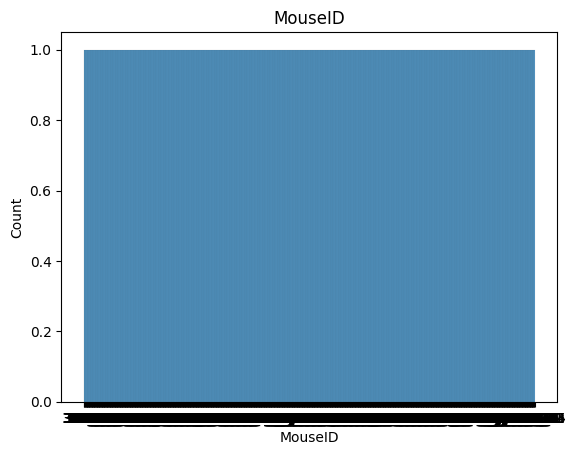

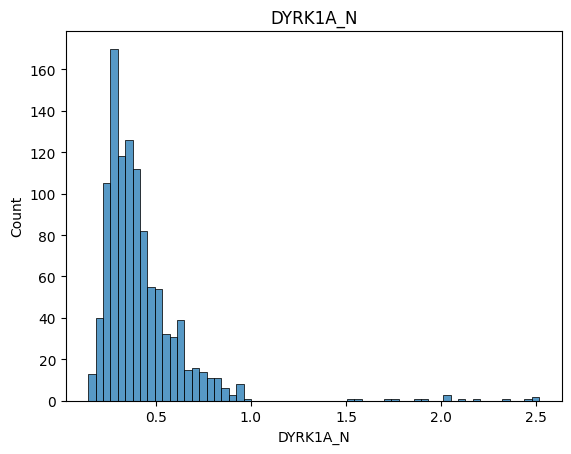

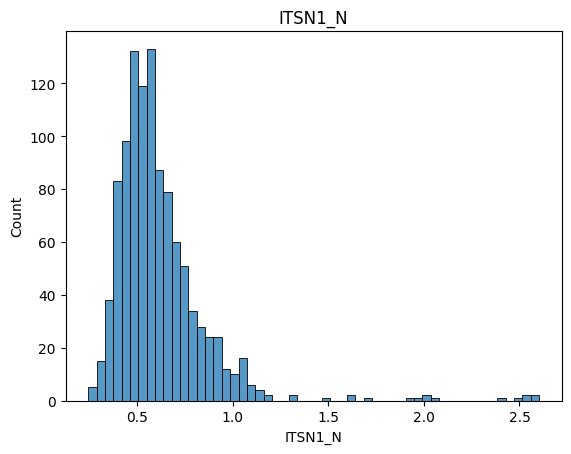

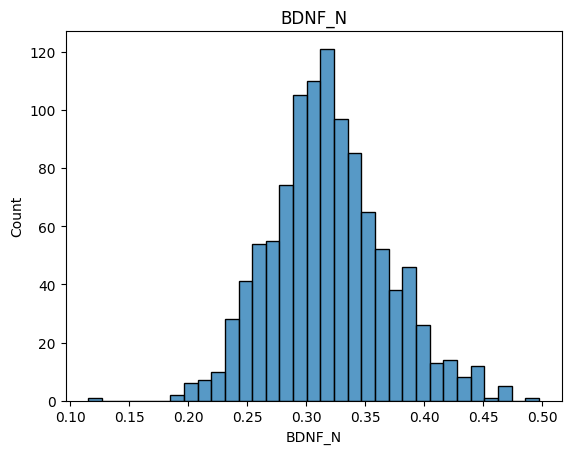

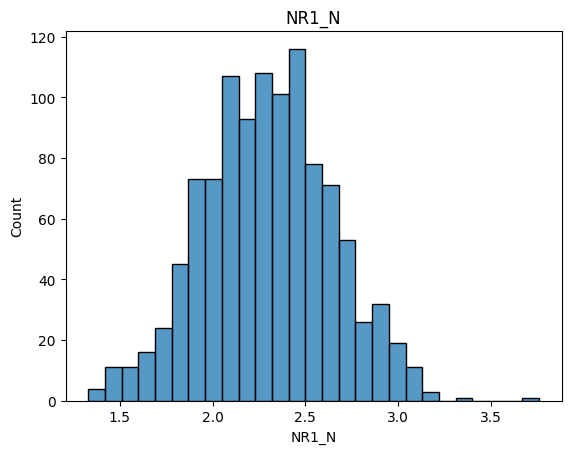

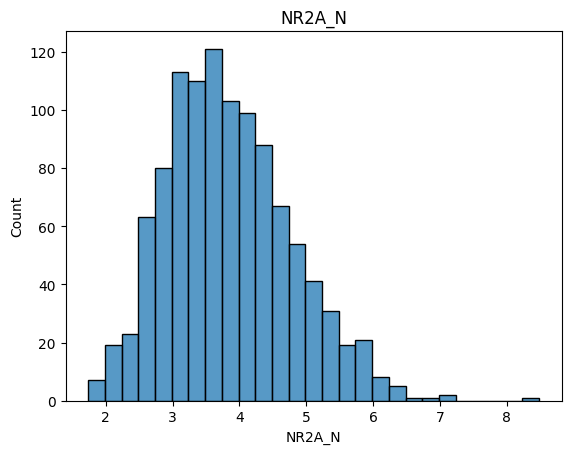

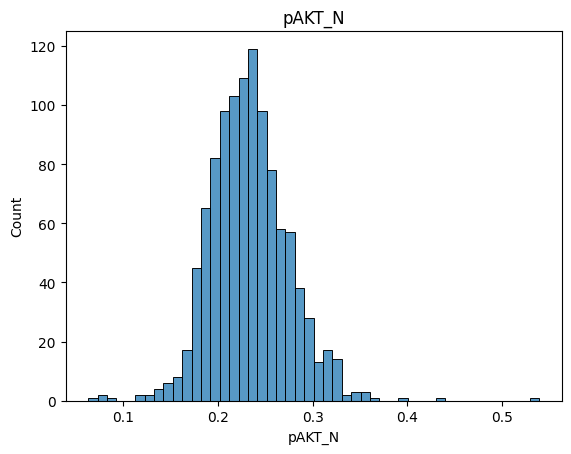

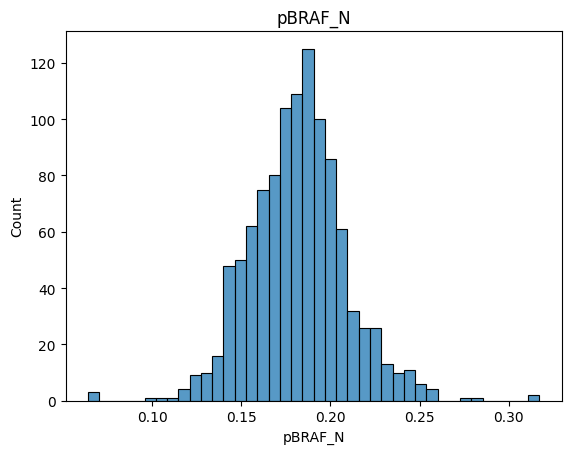

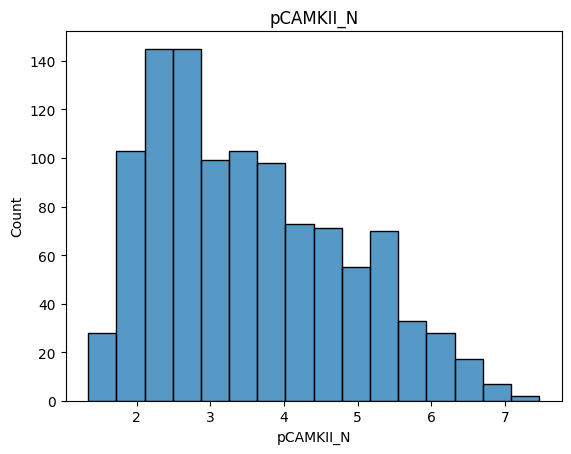

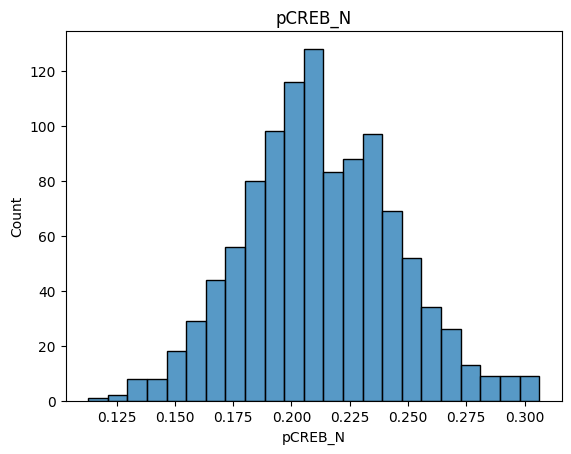

Missing Values After Imputation:
DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
p

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
### Q2 a) & b)
#[1]
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls" #[3]
data = pd.read_excel(url)

# Display Properties
print(data.head())
print(data.info())
print(data.describe())

# First few columns of data
columns_to_visualize = data.columns[:10]
for column in columns_to_visualize:
    sns.histplot(data[column])
    plt.title(column)
    plt.show()

# Pre-processing

# Identification of categorical columns and non-numeric columns
categorical_columns = ['Genotype', 'Treatment', 'Behavior', 'class']
non_numeric_columns = ['MouseID']

# Encode categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Exclude non-numeric columns
data_numeric = data.drop(columns=non_numeric_columns)

# Disable output truncation
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) # Made just to see all data instead of ..

# Apply multivariate feature imputation #[4]
imputer = IterativeImputer(max_iter=10, random_state=0)
data_imputed_numeric = imputer.fit_transform(data_numeric)

# Convert imputed data back to DataFrame
data_imputed = pd.DataFrame(data_imputed_numeric, columns=data_numeric.columns)

# Verify if missing values have been imputed
print("Missing Values After Imputation:")
print(data_imputed.isnull().sum())

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns') # That display is resetted (..)


In [ ]:
###Q2 c)
#[1]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# To split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# To train and validate the models
# i) Random Forest with hyperparameter tuning
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default hyperparameters
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
print("Random Forest Validation Accuracy:", rf_val_accuracy)

# ii) Support Vector Classification (SVC) with RBF kernel
svc_model = SVC(kernel='rbf', random_state=42)  # Default hyperparameters
svc_model.fit(X_train, y_train)
svc_val_predictions = svc_model.predict(X_val)
svc_val_accuracy = accuracy_score(y_val, svc_val_predictions)
print("SVC Validation Accuracy:", svc_val_accuracy)

# iii) Neural Network with single hidden layer and softmax activation
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                         alpha=0.0001, batch_size='auto', learning_rate='constant',
                         learning_rate_init=0.001, max_iter=200, random_state=42)
nn_model.fit(X_train, y_train)
nn_val_predictions = nn_model.predict(X_val)
nn_val_accuracy = accuracy_score(y_val, nn_val_predictions)
print("Neural Network Validation Accuracy:", nn_val_accuracy)

# To evaluate the model:

# Highest validation accuracy
best_model = max([(rf_val_accuracy, rf_model), (svc_val_accuracy, svc_model), (nn_val_accuracy, nn_model)])
print("Best Model Validation Accuracy:", best_model[0])
best_model = best_model[1]

# Test the selected model
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy of the Best Model:", test_accuracy)


Random Forest Validation Accuracy: 0.6670918367346939
SVC Validation Accuracy: 0.4502551020408163
Neural Network Validation Accuracy: 0.4846938775510204
Best Model Validation Accuracy: 0.6670918367346939
Test Accuracy of the Best Model: 0.673469387755102


In [ ]:
###Q2 d)
#[1]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
import pandas as pd

# To split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To define RFECV for Random Forest #[5]
rfecv_rf = RFECV(estimator=RandomForestClassifier(n_estimators=100, random_state=42), cv=3, n_jobs=-1)
rfecv_rf.fit(X_train, y_train)
selected_features_rf = X_train.columns[rfecv_rf.support_]

# To define RFECV for SVC with linear kernel
rfecv_svc = RFECV(estimator=SVC(kernel='linear', random_state=42), cv=3, n_jobs=-1)
rfecv_svc.fit(X_train, y_train)
selected_features_svc = X_train.columns[rfecv_svc.support_]

print("Selected Features for Random Forest:", selected_features_rf)
print("Selected Features for SVC with linear kernel:", selected_features_svc)

Selected Features for Random Forest: Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'alcohol'],
      dtype='object')
Selected Features for SVC with linear kernel: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [ ]:
#To upload Q3 data
from google.colab import files
uploaded = files.upload()

Saving hymenoptera_data.zip to hymenoptera_data.zip


In [6]:
#Q3 a)
#[1]
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import os
import time
import copy
import tempfile

# Define the train_model function
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with tempfile.TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

# Define the data directory
data_dir = '/content/hymenoptera_data'

# Define the data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train the model
model_conv = model_conv.to(device)
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cpu
Epoch 0/24
----------
train Loss: 0.6313 Acc: 0.6475
val Loss: 0.6627 Acc: 0.6667
Epoch 1/24
----------
train Loss: 0.5014 Acc: 0.7377
val Loss: 0.2704 Acc: 0.8693
Epoch 2/24
----------
train Loss: 0.3800 Acc: 0.8279
val Loss: 0.1457 Acc: 0.9608
Epoch 3/24
----------
train Loss: 0.4044 Acc: 0.8279
val Loss: 0.2639 Acc: 0.9020
Epoch 4/24
----------
train Loss: 0.6080 Acc: 0.7459
val Loss: 0.1721 Acc: 0.9412
Epoch 5/24
----------
train Loss: 0.3964 Acc: 0.8320
val Loss: 0.1621 Acc: 0.9346
Epoch 6/24
----------
train Loss: 0.5903 Acc: 0.7541
val Loss: 0.1882 Acc: 0.9412
Epoch 7/24
----------
train Loss: 0.3531 Acc: 0.8197
val Loss: 0.1865 Acc: 0.9281
Epoch 8/24
----------
train Loss: 0.3653 Acc: 0.8238
val Loss: 0.1608 Acc: 0.9412
Epoch 9/24
----------
train Loss: 0.3515 Acc: 0.8443
val Loss: 0.1560 Acc: 0.9542
Epoch 10/24
----------
train Loss: 0.3369 Acc: 0.8484
val Loss: 0.1691 Acc: 0.9412
Epoch 11/24
----------
train Loss: 0.3930 Acc: 0.8320
val Loss: 0.1498 Acc: 0.9

In [ ]:
### Q3 b)
#[1]
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np

def extract_features(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    features_list = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            features = model(inputs)  # Forward pass to get the features
            features_list.append(features.cpu().numpy())  # Convert features to numpy array and append to the list

    return np.concatenate(features_list)  # Concatenate the feature arrays into a single array

# Defining the data transforms
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# To create a dataset using the training images
train_dataset = datasets.ImageFolder('/content/hymenoptera_data/train', transform=data_transforms)

# Create a data loader for the training dataset
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=False)

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Remove the last fully connected layer
model = nn.Sequential(*list(model.children())[:-1])

# Send the model to the appropriate device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Extract features for training images
train_features = extract_features(model, train_dataloader)

print("Size of extracted features array:", train_features.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Size of extracted features array: (244, 512, 1, 1)


In [ ]:
### Q3 c)
#[1]
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_dataset.targets, test_size=0.2, random_state=42)

# Define the parameter grids for grid search
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

# Flatten the features
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Perform grid search for SVM
svm_grid_search = GridSearchCV(SVC(kernel='rbf'), svm_param_grid, cv=3)
svm_grid_search.fit(X_train_flattened, y_train)

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3)
rf_grid_search.fit(X_train_flattened, y_train)

# Get the best models from grid search
best_svm_model = svm_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the models on the test data
svm_pred = best_svm_model.predict(X_test_flattened)
rf_pred = best_rf_model.predict(X_test_flattened)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred, average='macro')

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1_score = f1_score(y_test, rf_pred, average='macro')

print("SVM - Accuracy:", svm_accuracy, "F1 Score:", svm_f1_score)
print("Random Forest - Accuracy:", rf_accuracy, "F1 Score:", rf_f1_score)


SVM - Accuracy: 0.4489795918367347 F1 Score: 0.30985915492957744
Random Forest - Accuracy: 0.9183673469387755 F1 Score: 0.9175084175084175


In [8]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [9]:
###Q4

import streamlit as st
import pandas as pd
from sklearn.externals import joblib

# Load the trained regression model
model = joblib.load('wine_quality_regression_model.pkl')

# Define the GUI elements
st.title('Wine Quality Predictor')
st.write('Enter the following attributes to predict the wine quality:')

fixed_acidity = st.slider('Fixed Acidity', min_value=4.0, max_value=16.0, value=8.0, step=0.1)
volatile_acidity = st.slider('Volatile Acidity', min_value=0.0, max_value=2.0, value=0.5, step=0.01)
citric_acid = st.slider('Citric Acid', min_value=0.0, max_value=1.0, value=0.5, step=0.01)
residual_sugar = st.slider('Residual Sugar', min_value=0.0, max_value=16.0, value=8.0, step=0.1)
chlorides = st.slider('Chlorides', min_value=0.0, max_value=1.0, value=0.08, step=0.01)
free_sulfur_dioxide = st.slider('Free Sulfur Dioxide', min_value=1, max_value=72, value=36, step=1)
total_sulfur_dioxide = st.slider('Total Sulfur Dioxide', min_value=6, max_value=289, value=144, step=1)
density = st.slider('Density', min_value=0.0, max_value=2.0, value=1.0, step=0.001)
pH = st.slider('pH', min_value=2.0, max_value=5.0, value=3.0, step=0.01)
sulphates = st.slider('Sulphates', min_value=0.0, max_value=2.0, value=0.5, step=0.01)
alcohol = st.slider('Alcohol', min_value=8.0, max_value=15.0, value=10.0, step=0.1)

# Handle prediction
if st.button('Predict'):
    # Create a DataFrame with the input data
    data = {
        'fixed acidity': [fixed_acidity],
        'volatile acidity': [volatile_acidity],
        'citric acid': [citric_acid],
        'residual sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free sulfur dioxide': [free_sulfur_dioxide],
        'total sulfur dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    }
    input_df = pd.DataFrame(data)

    # Make prediction
    prediction = model.predict(input_df)[0]

    st.write(f'Predicted wine quality: {prediction}')


ImportError: cannot import name 'joblib' from 'sklearn.externals' (/usr/local/lib/python3.10/dist-packages/sklearn/externals/__init__.py)